In [ ]:
# 1. Importação das bibliotecas necessárias

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import scipy.stats as sp

# Caminho para o arquivo CSV
caminho_arquivo = 'campeonato-brasileiro-full.csv'   

# 2. Carregar o CSV em um DataFrame
df = pd.read_csv('campeonato-brasileiro-full.csv')

# 3. Visualização das primeiras linhas do DataFrame (head)
print(df.head())


   ID  rodada        data   hora      dia       mandante    visitante  \
0   1       1  2003-03-29  16:00   Sabado        Guarani        Vasco   
1   2       1  2003-03-29  16:00   Sabado   Athletico-PR       Gremio   
2   3       1  2003-03-30  16:00  Domingo       Flamengo     Coritiba   
3   4       1  2003-03-30  16:00  Domingo          Goias     Paysandu   
4   5       1  2003-03-30  16:00  Domingo  Internacional  Ponte Preta   

  formacao_mandante formacao_visitante tecnico_mandante tecnico_visitante  \
0               NaN                NaN              NaN               NaN   
1               NaN                NaN              NaN               NaN   
2               NaN                NaN              NaN               NaN   
3               NaN                NaN              NaN               NaN   
4               NaN                NaN              NaN               NaN   

       vencedor             arena  mandante_placar  visitante_placar  \
0       Guarani    brinco 

In [ ]:
# 4. Verificação de informações gerais (info, shape, tipos de dados, valores nulos)

# Ver informações gerais sobre colunas, tipos e valores não nulos
print(df.info())

# Ver o número de linhas e colunas
print("Shape do DataFrame:", df.shape)

# Ver tipos de dados de cada coluna
print("Tipos de dados:\n", df.dtypes)

# Contar valores nulos por coluna
print("Valores nulos por coluna:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7645 entries, 0 to 7644
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  7645 non-null   int64 
 1   rodada              7645 non-null   int64 
 2   data                7645 non-null   object
 3   hora                7645 non-null   object
 4   dia                 7645 non-null   object
 5   mandante            7645 non-null   object
 6   visitante           7645 non-null   object
 7   formacao_mandante   2671 non-null   object
 8   formacao_visitante  2671 non-null   object
 9   tecnico_mandante    3035 non-null   object
 10  tecnico_visitante   3035 non-null   object
 11  vencedor            7645 non-null   object
 12  arena               7645 non-null   object
 13  mandante_placar     7645 non-null   int64 
 14  visitante_placar    7645 non-null   int64 
 15  mandante_estado     7645 non-null   object
 16  visitante_estado    7645

In [ ]:
# 5. Estatísticas descritivas básicas (describe)

print(df.describe())

                ID       rodada  mandante_placar  visitante_placar
count  7645.000000  7645.000000      7645.000000       7645.000000
mean   3823.000000    20.196207         1.554088          1.027338
std    2207.065737    11.489249         1.234262          1.030366
min       1.000000     1.000000         0.000000          0.000000
25%    1912.000000    10.000000         1.000000          0.000000
50%    3823.000000    20.000000         1.000000          1.000000
75%    5734.000000    30.000000         2.000000          2.000000
max    7645.000000    46.000000         7.000000          7.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7645 entries, 0 to 7644
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  7645 non-null   int64 
 1   rodada              7645 non-null   int64 
 2   data                7645 non-null   object
 3   hora                7645 non-null   object
 4

In [ ]:
# 6. Contagem de valores ausentes por coluna

contagem_ausentes = df.isna().sum()
print("\nContagem de valores ausentes por coluna:")
print(contagem_ausentes)


Contagem de valores ausentes por coluna:
ID                       0
rodada                   0
data                     0
hora                     0
dia                      0
mandante                 0
visitante                0
formacao_mandante     4974
formacao_visitante    4974
tecnico_mandante      4610
tecnico_visitante     4610
vencedor                 0
arena                    0
mandante_placar          0
visitante_placar         0
mandante_estado          0
visitante_estado         0
estado_vencedor          0
dtype: int64


In [ ]:
# 7. ratamento de valores ausentes (ex.: substituição, remoção ou imputação)

# Substituir ausentes em todo o DataFrame: df_filled = df.fillna('Desconhecido')
# Verificar: print(df_filled.isnull().sum())

# Impute com a moda (valor mais frequente) por coluna: 
# for col in ['formacao_mandante', 'formacao_visitante', 'tecnico_mandante', 'tecnico_visitante']:
    # moda = df[col].mode()[0]  # Pega o primeiro valor mais frequente
    # df[col] = df[col].fillna(moda)
# Verifiqar: print(df.isnull().sum())



# Remoção linhas com qualquer valor ausente
df_clean = df.dropna()

# Verifique o novo tamanho
print("Tamanho original:", df.shape)
print("Tamanho após remoção:", df_clean.shape)

Tamanho original: (7645, 18)
Tamanho após remoção: (2670, 18)


In [ ]:
#  8. Identificação de outliers (ex.: Z-Score em mandante_placar e visitante_placar)

# Função para calcular Z-Scores e identificar outliers
def identificar_outliers(df, coluna, limiar=3):
    media = df[coluna].mean()
    desvio_padrao = df[coluna].std()
    df['z_score_' + coluna] = (df[coluna] - media) / desvio_padrao
    return df[abs(df['z_score_' + coluna]) > limiar]

# Identificar outliers em mandante_placar e visitante_placar
outliers_mandante = identificar_outliers(df, 'mandante_placar')
outliers_visitante = identificar_outliers(df, 'visitante_placar')

# Exibir exemplos de outliers
print("\nExemplos de outliers em mandante_placar:")
print(outliers_mandante[['data', 'mandante', 'visitante', 'mandante_placar', 'visitante_placar', 'z_score_mandante_placar']])
print("\nExemplos de outliers em visitante_placar:")
print(outliers_visitante[['data', 'mandante', 'visitante', 'mandante_placar', 'visitante_placar', 'z_score_visitante_placar']])


Exemplos de outliers em mandante_placar:
            data       mandante        visitante  mandante_placar  \
23    2003-04-06          Vasco            Goias                6   
27    2003-04-12    Corinthians         Paysandu                6   
65    2003-04-27          Goias        Juventude                7   
125   2003-06-01         Parana         Flamengo                6   
270   2003-08-03       Paysandu          Guarani                6   
284   2003-08-07       Flamengo            Bahia                6   
391   2003-09-28      Juventude      Corinthians                6   
427   2003-10-12          Goias       Fluminense                6   
476   2003-11-02    Figueirense         Paysandu                6   
573   2004-04-25        Vitoria           Parana                6   
617   2004-05-16       Criciuma            Goias                7   
727   2004-07-13   Athletico-PR            Goias                6   
733   2004-07-17  Internacional     Athletico-PR             

In [ ]:
# 9. Remoção ou tratamento dos outliers identificados

# Função para calcular Z-Scores e identificar outliers
def identificar_outliers(df, coluna, limiar=3):
    media = df[coluna].mean()
    desvio_padrao = df[coluna].std()
    df['z_score_' + coluna] = (df[coluna] - media) / desvio_padrao
    return df[abs(df['z_score_' + coluna]) > limiar]

# Identificar outliers em mandante_placar e visitante_placar
outliers_mandante = identificar_outliers(df, 'mandante_placar')
outliers_visitante = identificar_outliers(df, 'visitante_placar')

# Remoção de outliers
def remover_outliers(df, colunas, limiar=3):
    for coluna in colunas:
        media = df[coluna].mean()
        desvio_padrao = df[coluna].std()
        df = df[abs((df[coluna] - media) / desvio_padrao) <= limiar]
    return df

# Remover outliers de mandante_placar e visitante_placar
df_sem_outliers = remover_outliers(df, ['mandante_placar', 'visitante_placar'])
print("Tamanho original:", df.shape)
print("Tamanho após remoção:", df_sem_outliers.shape)
df_sem_outliers.to_csv('dataset_sem_outliers.csv', index=False)


Tamanho original: (7645, 20)
Tamanho após remoção: (7573, 20)


In [ ]:
# 10. Normalização de uma coluna numérica (ex.: rodada ou placares com Min-Max Scaling)

import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Escolher a coluna numérica que será normalizada
coluna = "rodada"  # pode trocar para "mandante_placar" ou "visitante_placar"

# Criar o scaler
scaler = MinMaxScaler()

# Aplicar normalização (transforma em valores entre 0 e 1)
df[f"{coluna}_normalizado"] = scaler.fit_transform(df[[coluna]])

# Visualizar primeiras linhas
print(df[[coluna, f"{coluna}_normalizado"]].head())


   rodada  rodada_normalizado
0       1                 0.0
1       1                 0.0
2       1                 0.0
3       1                 0.0
4       1                 0.0


In [ ]:
# 11. Codificação de variáveis categóricas (ex.: mandante_estado, visitante_estado, vencedor com One-Hot Encoding)


# Selecionar colunas categóricas que serão codificadas
colunas_categoricas = ["mandante_estado", "visitante_estado", "vencedor"]

# Aplicar One-Hot Encoding
df_codificado = pd.get_dummies(df, columns=colunas_categoricas, drop_first=True)

# Visualizar primeiras colunas resultantes
print(df_codificado.head())
print("\nNovo número de colunas:", df_codificado.shape[1])


   ID  rodada        data   hora      dia       mandante    visitante  \
0   1       1  2003-03-29  16:00   Sabado        Guarani        Vasco   
1   2       1  2003-03-29  16:00   Sabado   Athletico-PR       Gremio   
2   3       1  2003-03-30  16:00  Domingo       Flamengo     Coritiba   
3   4       1  2003-03-30  16:00  Domingo          Goias     Paysandu   
4   5       1  2003-03-30  16:00  Domingo  Internacional  Ponte Preta   

  formacao_mandante formacao_visitante tecnico_mandante  ...  \
0               NaN                NaN              NaN  ...   
1               NaN                NaN              NaN  ...   
2               NaN                NaN              NaN  ...   
3               NaN                NaN              NaN  ...   
4               NaN                NaN              NaN  ...   

  vencedor_Ponte Preta vencedor_Portuguesa  vencedor_Santa Cruz  \
0                False               False                False   
1                False               False

In [ ]:
# 12. Criação de matriz de correlação (focando nos placares e rodadas)

# Selecionar apenas colunas numéricas de interesse
colunas = ["rodada", "mandante_placar", "visitante_placar"]
df_corr = df[colunas]

# Criar matriz de correlação
correlacao = df_corr.corr()

print("Matriz de Correlação:")
print(correlacao)

Matriz de Correlação:
                    rodada  mandante_placar  visitante_placar
rodada            1.000000         0.031835           0.00095
mandante_placar   0.031835         1.000000           0.05382
visitante_placar  0.000950         0.053820           1.00000


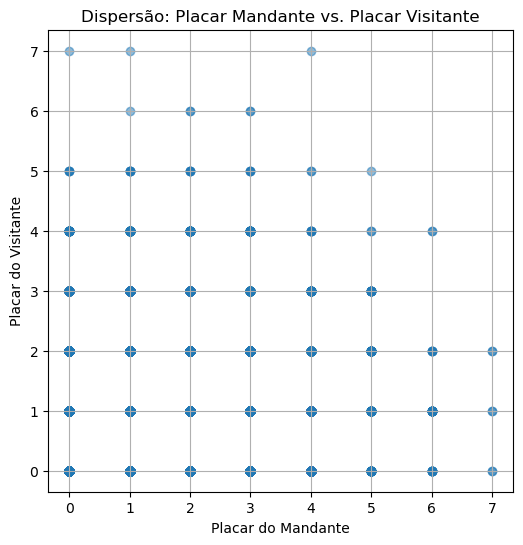

In [ ]:
# 13. Gráfico de dispersão (ex.: placar mandante vs. placar visitante)

import matplotlib.pyplot as plt


# Criar gráfico de dispersão
plt.figure(figsize=(6,6))
plt.scatter(df["mandante_placar"], df["visitante_placar"], alpha=0.5)

plt.title("Dispersão: Placar Mandante vs. Placar Visitante")
plt.xlabel("Placar do Mandante")
plt.ylabel("Placar do Visitante")
plt.grid(True)
plt.show()

In [ ]:
# 14. Filtragem de dados com base em uma condição (ex.: jogos do Flamengo como mandante)

# Filtrar jogos em que o mandante foi o Flamengo
jogos_fla_mandante = df[df["mandante"] == "Flamengo"]

# Mostrar os primeiros jogos encontrados
print(jogos_fla_mandante.head())

      ID  rodada        data   hora      dia  mandante   visitante  \
2      3       1  2003-03-30  16:00  Domingo  Flamengo    Coritiba   
35    48       3  2003-04-13  18:00  Domingo  Flamengo  Fluminense   
50    51       5  2003-04-19  18:00   Sabado  Flamengo      Santos   
72    73       7  2003-05-03  16:00   Sabado  Flamengo     Vitoria   
106  107       9  2003-05-18  18:00  Domingo  Flamengo     Guarani   

    formacao_mandante formacao_visitante tecnico_mandante  ...  vencedor  \
2                 NaN                NaN              NaN  ...         -   
35                NaN                NaN              NaN  ...  Flamengo   
50                NaN                NaN              NaN  ...    Santos   
72                NaN                NaN              NaN  ...  Flamengo   
106               NaN                NaN              NaN  ...         -   

        arena mandante_placar  visitante_placar  mandante_estado  \
2    maracana               1                 1       

In [ ]:
# 15. Exportação do DataFrame processado para CSV

df.to_csv("dados_processados.csv", index=False)


In [ ]:
# 16. Conversão da coluna de datas (data) para tipo datetime e extração de novas colunas (ano, mês)

# Criar colunas de ano e mês
df['ano'] = df['data'].dt.year
df['mes'] = df['data'].dt.month

# Visualizar resultado
print(df[['data', 'ano', 'mes']].head())

        data   ano  mes
0 2003-03-29  2003    3
1 2003-03-29  2003    3
2 2003-03-30  2003    3
3 2003-03-30  2003    3
4 2003-03-30  2003    3


In [29]:
# 17. Agrupamento dos dados (ex.: número de vitórias por estado, ou por time)

# Converte a coluna de data 
df['data'] = pd.to_datetime(df['data'], errors='coerce')

# Contar vitórias por estado vencedor
vitorias_estado = df.groupby('estado_vencedor').size().reset_index(name='vitorias')

print(vitorias_estado)

   estado_vencedor  vitorias
0                -      2015
1               AL         8
2               BA       238
3               CE       143
4               DF        10
5               GO       253
6               MG       633
7               MT        10
8               PA        41
9               PE       200
10              PR       531
11              RJ      1012
12              RN         4
13              RS       681
14              SC       326
15              SP      1540


In [30]:
#  18. Criação de colunas derivadas (ex.: diferença de gols = mandante_placar - visitante_placar)

# Criar coluna diferença de gols
df['dif_gols'] = df['mandante_placar'] - df['visitante_placar']

print(df[['mandante_placar', 'visitante_placar', 'dif_gols']].head())

   mandante_placar  visitante_placar  dif_gols
0                4                 2         2
1                2                 0         2
2                1                 1         0
3                2                 2         0
4                1                 1         0


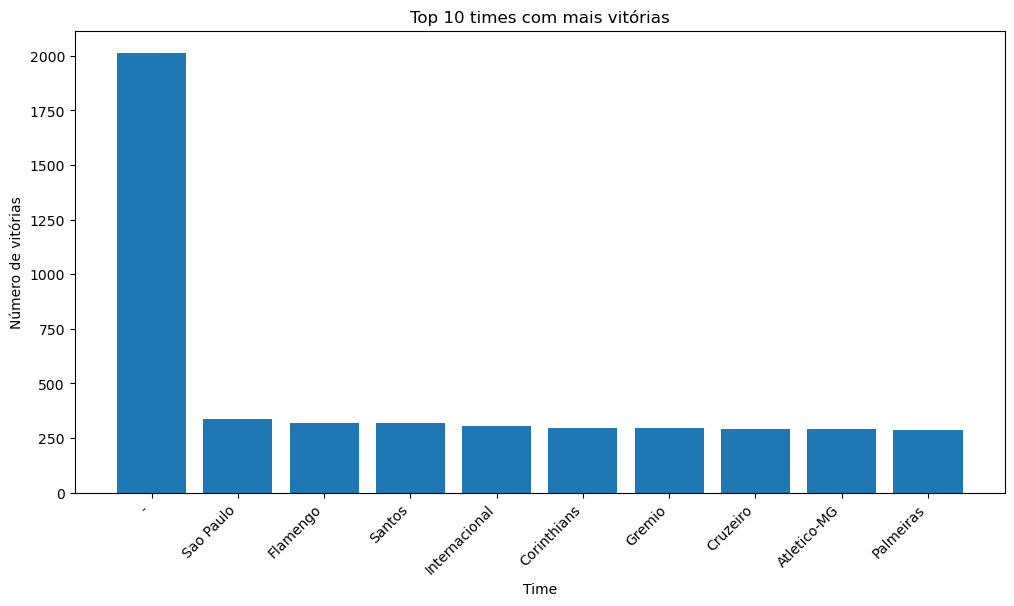

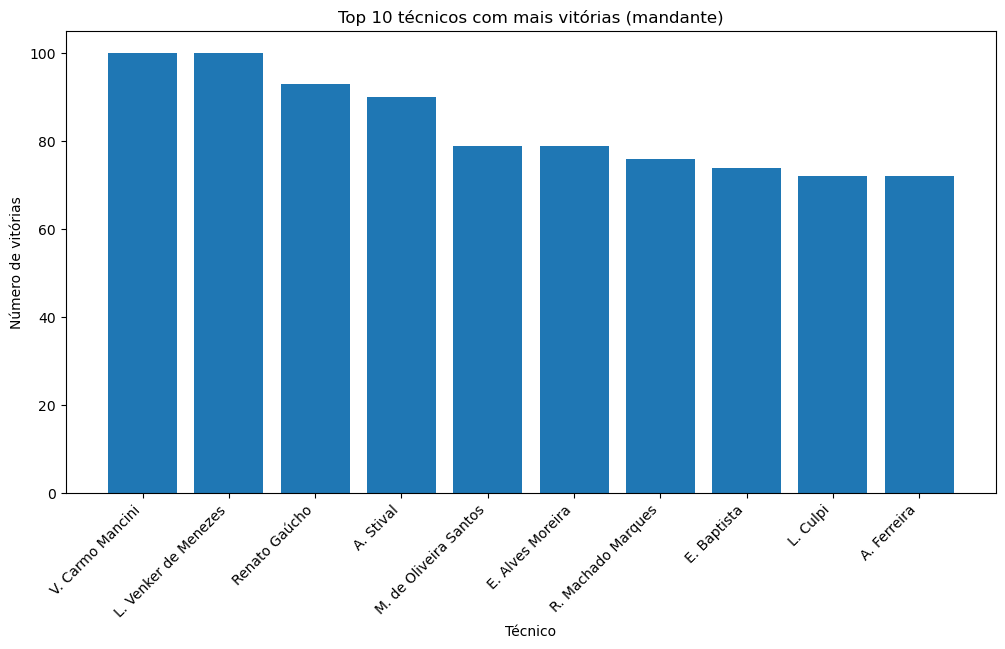

In [32]:
# 19. Visualização com gráficos de barras (ex.: número de vitórias por time ou por técnico)

import matplotlib.pyplot as plt

# Contar vitórias por time vencedor
vitorias_time = df.groupby('vencedor').size().reset_index(name='vitorias')

# Ordenar do maior para o menor
vitorias_time = vitorias_time.sort_values(by='vitorias', ascending=False).head(10)

# Plotar gráfico de barras
plt.figure(figsize=(12,6))
plt.bar(vitorias_time['vencedor'], vitorias_time['vitorias'])
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 times com mais vitórias")
plt.xlabel("Time")
plt.ylabel("Número de vitórias")
plt.show()

# Contar vitórias por técnico vencedor
vitorias_tecnico = df.groupby('tecnico_mandante').size().reset_index(name='vitorias')

# Ordenar top 10
vitorias_tecnico = vitorias_tecnico.sort_values(by='vitorias', ascending=False).head(10)

# Gráfico
plt.figure(figsize=(12,6))
plt.bar(vitorias_tecnico['tecnico_mandante'], vitorias_tecnico['vitorias'])
plt.xticks(rotation=45, ha="right")
plt.title("Top 10 técnicos com mais vitórias (mandante)")
plt.xlabel("Técnico")
plt.ylabel("Número de vitórias")
plt.show()


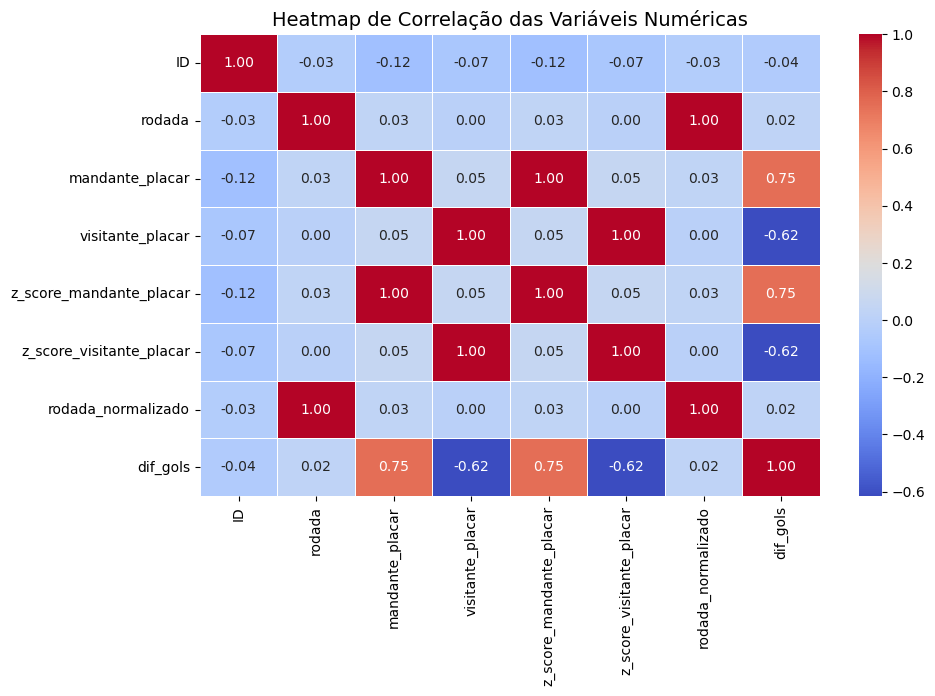

In [33]:
# 20. Heatmap da correlação para visualizar relações de forma mais clara

import seaborn as sns

# Selecionar apenas colunas numéricas
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Matriz de correlação
corr = df_numeric.corr()

# Plotar heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap de Correlação das Variáveis Numéricas", fontsize=14)
plt.show()